# Benefit of Multiplicative (MPL) Models over Nominal (Nom) Models of Systems
Testing actuator selection and feedback of Nominal and MPL models on simulations of True system

##### Py Packages

In [1]:
import numpy as np
from copy import deepcopy as dc
# %matplotlib widget

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import simulation_nom_vs_mpl, plot_simulation_nom_vs_mpl_1, plot_simulation_nom_vs_mpl_2, actuator_comparison

## Code

In [2]:
test_set = 'System Model 4'
S_True = sys_from_file(test_set + ' True')
S_MPL = sys_from_file(test_set + ' MPL')
S_Nom = sys_from_file(test_set + ' Nominal')

System read from file @ system_model/System Model 4 True.pickle 

System read from file @ system_model/System Model 4 MPL.pickle 

System read from file @ system_model/System Model 4 Nominal.pickle 



In [3]:
ret_sim = simulation_nom_vs_mpl(S_Nom, S_MPL, S_True)

## Output

#### System Models

##### True System

max(abs(eigvals(A)))= 0.9500


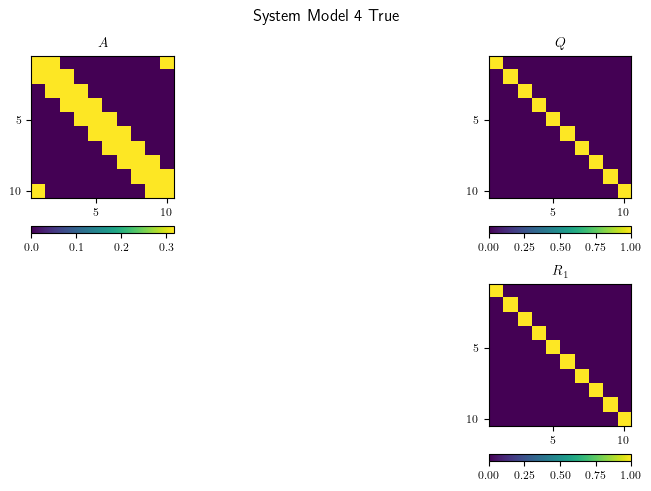

In [4]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(S_True['A'])))))
system_display_matrix(S_True)

##### Nominal Model

max(abs(eigvals(A)))= 0.9500


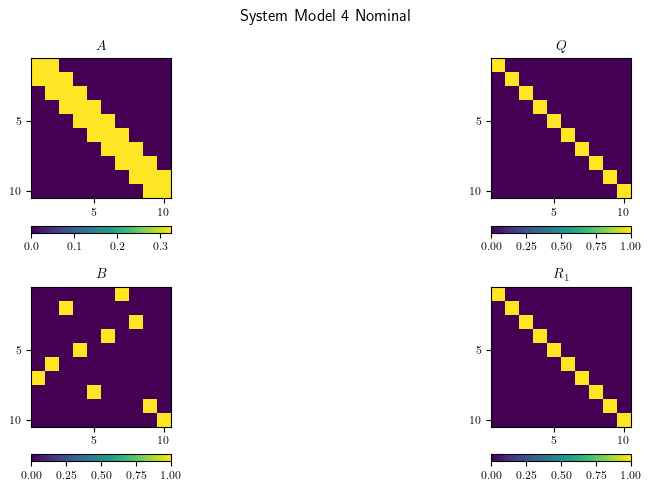

In [5]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_nom']['A'])))))
system_display_matrix(ret_sim['system_nom'])

##### Multiplicative Noise Model

max(abs(eigvals(A)))= 0.9500


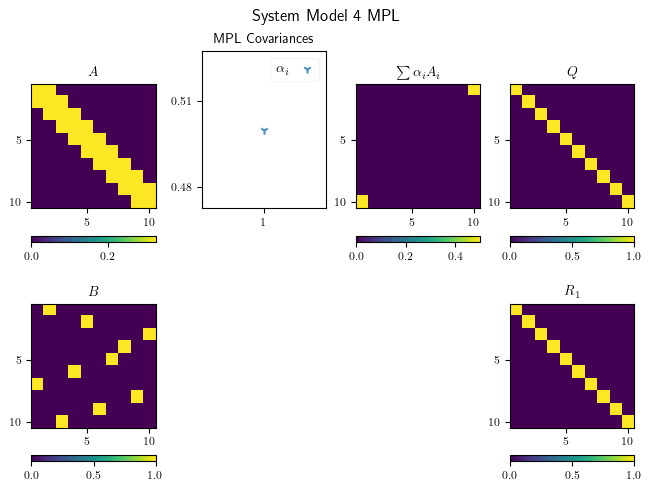

In [6]:
print('max(abs(eigvals(A)))= %.4f' % (np.max(np.abs(np.linalg.eigvals(ret_sim['system_mpl']['A'])))))
system_display_matrix(ret_sim['system_mpl'])

#### Simulation - Trajectory, Control Input and Costs

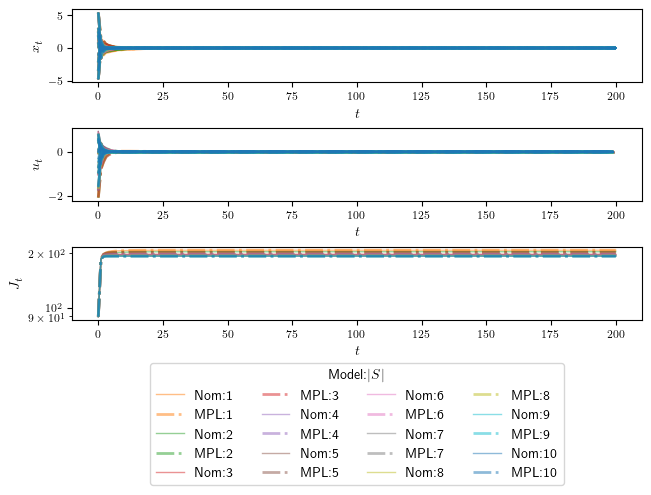

In [7]:
plot_simulation_nom_vs_mpl_1(ret_sim)

#### Actuator set comparison

Control sets are different


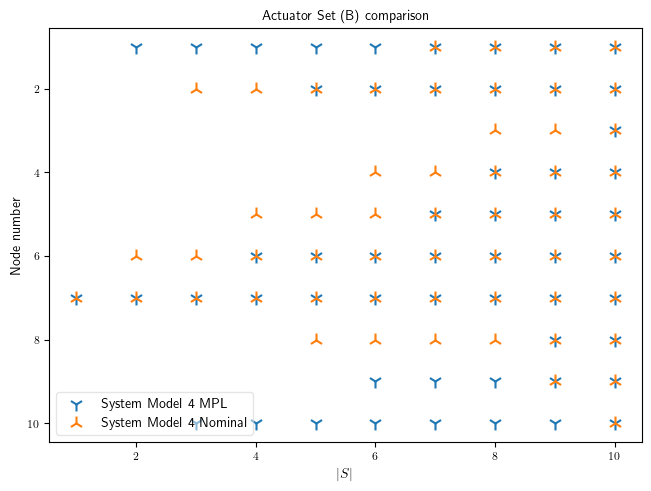

In [8]:
actuator_comparison(ret_sim['system_mpl'], ret_sim['system_nom']);

#### Simulated costs

In [9]:
print('True simulation cost with <___> feedback (4decimal approx)')
for key in ret_sim['T_Nom']['costs']:
    print ("|S|: %s | Nom: %.4f | MPL: %.4f | Diff (Nom-MPL) %.4f" % (key, ret_sim['T_Nom']['costs'][key][-1], ret_sim['T_MPL']['costs'][key][-1], ret_sim['T_Nom']['costs'][key][-1]-ret_sim['T_MPL']['costs'][key][-1]))
#     print('|S|:', key, '| Nom:', ret_sim['T_Nom']['costs'][key][-1], '| MPL:', ret_sim['T_MPL']['costs'][key][-1], ' | Diff (Nom-MPL):', ret_sim['T_Nom']['costs'][key][-1]-ret_sim['T_MPL']['costs'][key][-1])

True simulation cost with <___> feedback (4decimal approx)
|S|: 1 | Nom: 205.9103 | MPL: 205.9003 | Diff (Nom-MPL) 0.0100
|S|: 2 | Nom: 201.9456 | MPL: 200.5380 | Diff (Nom-MPL) 1.4076
|S|: 3 | Nom: 195.6888 | MPL: 199.9945 | Diff (Nom-MPL) -4.3056
|S|: 4 | Nom: 194.4778 | MPL: 195.5688 | Diff (Nom-MPL) -1.0910
|S|: 5 | Nom: 194.2584 | MPL: 193.7630 | Diff (Nom-MPL) 0.4954
|S|: 6 | Nom: 193.5221 | MPL: 193.5569 | Diff (Nom-MPL) -0.0348
|S|: 7 | Nom: 192.0734 | MPL: 192.4215 | Diff (Nom-MPL) -0.3482
|S|: 8 | Nom: 191.8265 | MPL: 191.6409 | Diff (Nom-MPL) 0.1856
|S|: 9 | Nom: 191.3622 | MPL: 190.9935 | Diff (Nom-MPL) 0.3687
|S|: 10 | Nom: 190.7976 | MPL: 190.7452 | Diff (Nom-MPL) 0.0524


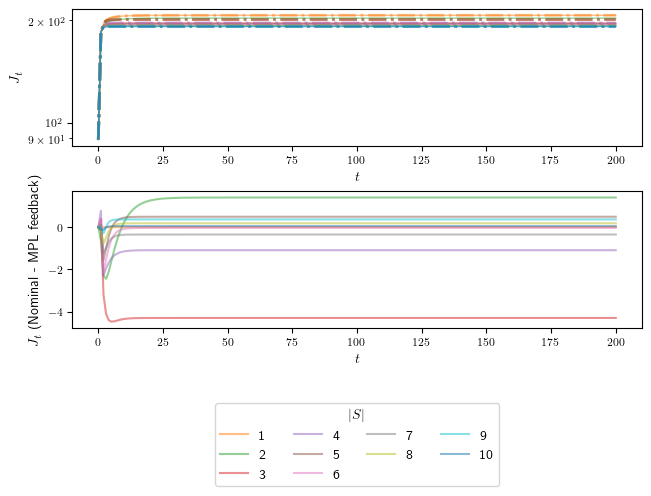

In [10]:
plot_simulation_nom_vs_mpl_2(ret_sim)

## Run Complete

In [11]:
print('Run Complete')

Run Complete
